In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
import zplane

%matplotlib notebook

In [10]:
zeros = np.array([0])
poles = np.array([1.0/4, 1.0/2])
gain  = 1



In [3]:
print(help(np))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



###### Basit kesirlere ayırma ->

In [11]:
b , a = sgnl.zpk2tf(zeros , poles , gain)

print( b)
print(a)

a1 = sgnl.convolve(np.array([1, -1/4]),np.array([1, -1/2]))

print(a1)

[1. 0.]
[ 1.    -0.75   0.125]
[ 1.    -0.75   0.125]


In [12]:
r , p , k = sgnl.residuez(b , a)

poless = np.roots(a)

print(r , p , k)

[-1.  2.] [0.25 0.5 ] [0.]


###### Kuvvet serisi ile açma -a>

In [53]:
num   = np.array([1 , 0 , 0 ])
denum = np.array([1 , -3.0/4 , 1.0/8])

n , x = sgnl.dimpulse((num , denum , 1 ) , n = 10)

print(np.squeeze(x))


[1.         0.75       0.4375     0.234375   0.12109375 0.06152344
 0.03100586 0.01556396 0.00779724 0.00390244]


<IPython.core.display.Javascript object>


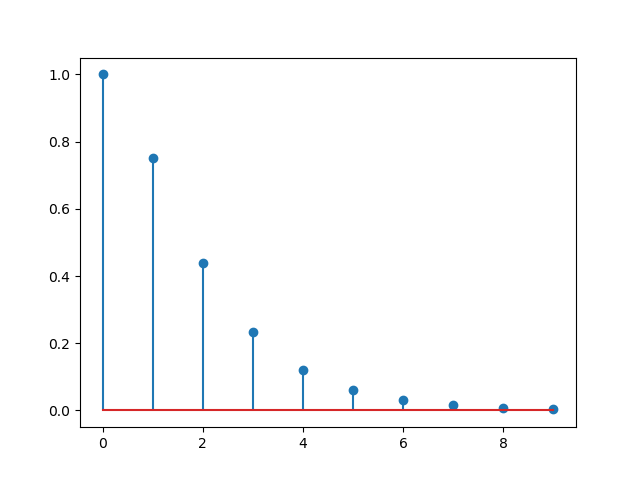

<StemContainer object of 3 artists>

In [55]:
plt.stem( n , np.squeeze(x) , use_line_collection = "True")

###### 9->

In [56]:
print(help(sgnl.freqz_zpk))

Help on function freqz_zpk in module scipy.signal.filter_design:

freqz_zpk(z, p, k, worN=512, whole=False, fs=6.283185307179586)
    Compute the frequency response of a digital filter in ZPK form.
    
    Given the Zeros, Poles and Gain of a digital filter, compute its frequency
    response:
    
    :math:`H(z)=k \prod_i (z - Z[i]) / \prod_j (z - P[j])`
    
    where :math:`k` is the `gain`, :math:`Z` are the `zeros` and :math:`P` are
    the `poles`.
    
    Parameters
    ----------
    z : array_like
        Zeroes of a linear filter
    p : array_like
        Poles of a linear filter
    k : scalar
        Gain of a linear filter
    worN : {None, int, array_like}, optional
        If a single integer, then compute at that many frequencies (default is
        N=512).
    
        If an array_like, compute the response at the frequencies given.
        These are in the same units as `fs`.
    whole : bool, optional
        Normally, frequencies are computed from 0 to the Nyqui

<IPython.core.display.Javascript object>


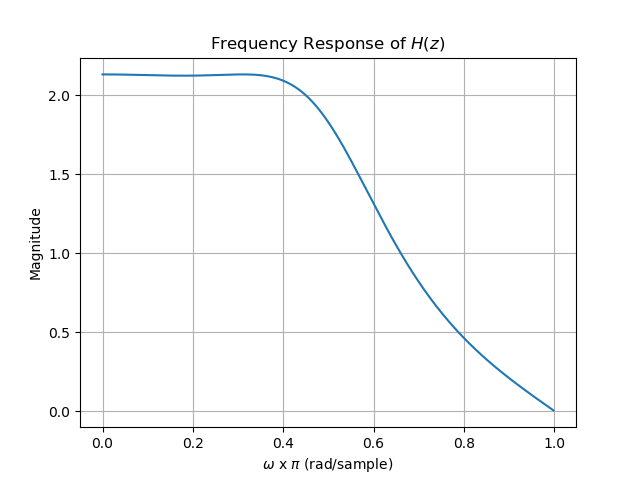

In [57]:
zeros = np.array([-1])
poles = np.array([1j/2, -1j/2, 1.0/4])

w , H = sgnl.freqz_zpk(zeros ,poles , 1)

plt.figure()
plt.plot(w/np.pi , abs(H) )
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude')
plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

In [34]:
print(help(sgnl.zpk2tf))

Help on function zpk2tf in module scipy.signal.filter_design:

zpk2tf(z, p, k)
    Return polynomial transfer function representation from zeros and poles
    
    Parameters
    ----------
    z : array_like
        Zeros of the transfer function.
    p : array_like
        Poles of the transfer function.
    k : float
        System gain.
    
    Returns
    -------
    b : ndarray
        Numerator polynomial coefficients.
    a : ndarray
        Denominator polynomial coefficients.

None


In [35]:
print(help(sgnl.freqz))

Help on function freqz in module scipy.signal.filter_design:

freqz(b, a=1, worN=512, whole=False, plot=None, fs=6.283185307179586)
    Compute the frequency response of a digital filter.
    
    Given the M-order numerator `b` and N-order denominator `a` of a digital
    filter, compute its frequency response::
    
                 jw                 -jw              -jwM
        jw    B(e  )    b[0] + b[1]e    + ... + b[M]e
     H(e  ) = ------ = -----------------------------------
                 jw                 -jw              -jwN
              A(e  )    a[0] + a[1]e    + ... + a[N]e
    
    Parameters
    ----------
    b : array_like
        Numerator of a linear filter.  If `b` has dimension greater than 1,
        it is assumed that the coefficients are stored in the first dimension,
        and ``b.shape[1:]``, ``a.shape[1:]``, and the shape of the frequencies
        array must be compatible for broadcasting.
    a : array_like
        Denominator of a linear filter.

<IPython.core.display.Javascript object>


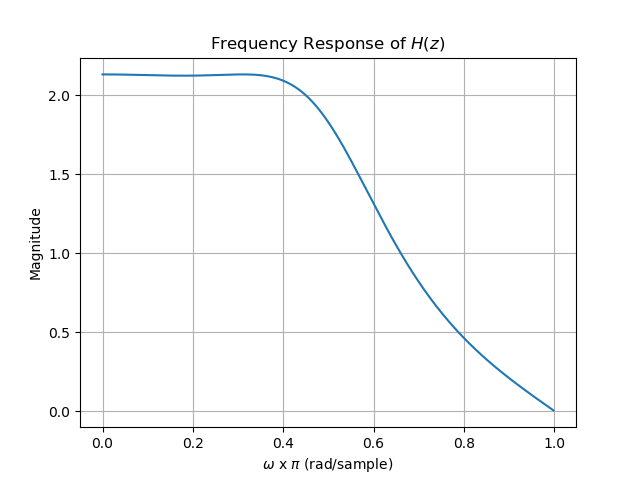

In [36]:
num , denum = sgnl.zpk2tf(zeros , poles , 1)

w1 , H_tf   = sgnl.freqz( num , denum )

plt.figure()
plt.plot(w1/np.pi, abs(H_tf))
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


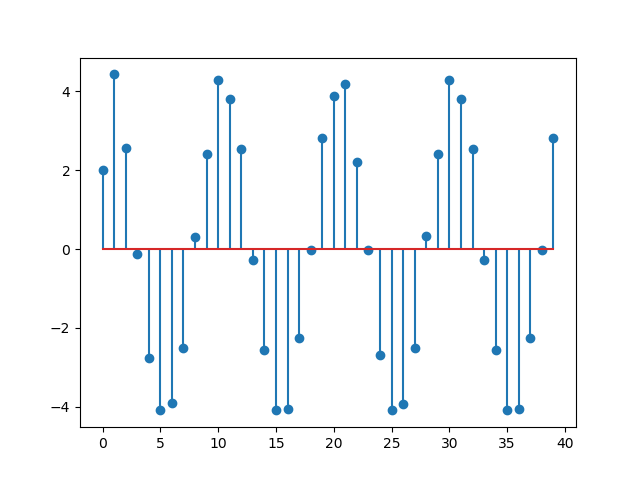

<StemContainer object of 3 artists>

In [37]:
n = np.arange(0 , 40 , 1)
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n)

yn = sgnl.lfilter(num , denum , xn)

plt.figure()
plt.stem(n , yn , use_line_collection = "True")

<IPython.core.display.Javascript object>


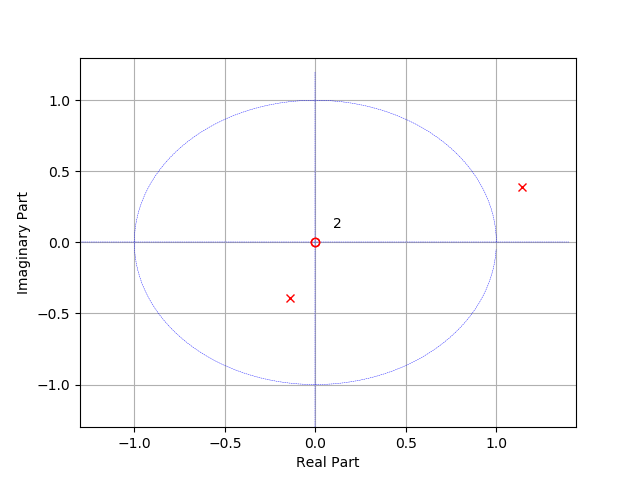

In [58]:
zeross = np.array([-1])
poless = np.array([-1j/2, 1j/2, -1/4])
k = 1

b , a = sgnl.zpk2tf(zeross , poless , k )
zplane.zplane(b , a)



######  Z-Transform -> Frequency Response

<IPython.core.display.Javascript object>


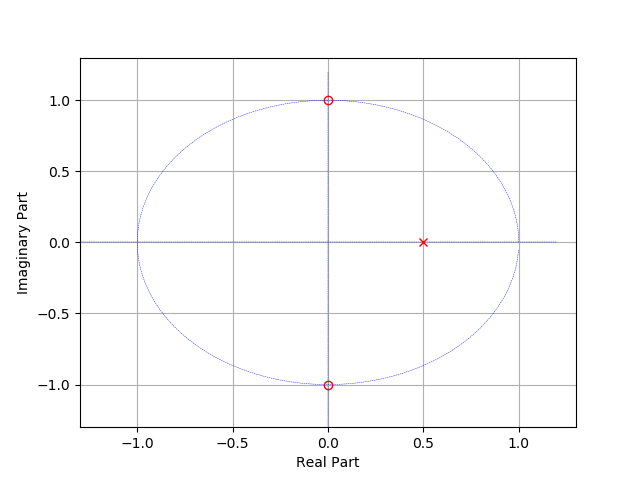

In [41]:
num = np.array([1, 0, 1])
denum = np.array([1, -1.0/2])

zplane.zplane(num, denum)

<IPython.core.display.Javascript object>


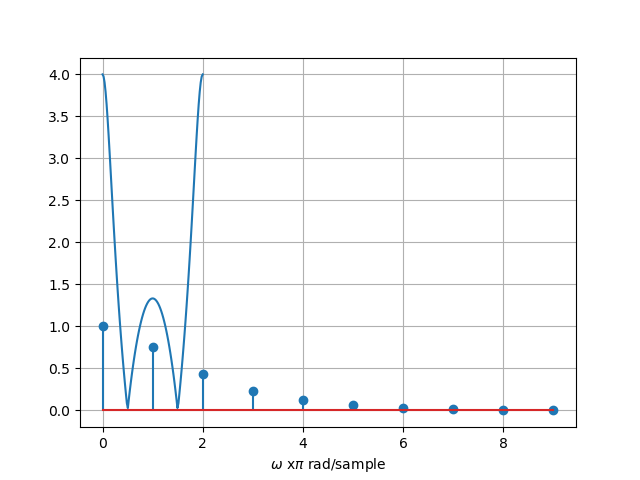

Text(0.5, 0, '$\\omega$ x$\\pi$ rad/sample')

In [42]:
w = np.linspace(0, 2*np.pi, 100)

Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
Hw_abs = abs(Hw)

plt.figure()
plt.plot(w/np.pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')

In [1]:
print(help(numpy))

NameError: name 'numpy' is not defined